# Prism Data

In [14]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import re

In [15]:
inflows = pd.read_parquet('/uss/hdsi-prismdata/q1-ucsd-inflows.pqt')

In [16]:
outflows = pd.read_parquet('/uss/hdsi-prismdata/q1-ucsd-outflows.pqt')

In [17]:
inflows.head(5)

,prism_consumer_id,prism_account_id,memo,amount,posted_date,category
0,0,acc_0,PAYCHECK,2477.02,2022-03-18,PAYCHECK
1,0,acc_0,EXTERNAL_TRANSFER,100.00,2022-10-25,EXTERNAL_TRANSFER
2,0,acc_0,MISCELLANEOUS,6.29,2022-08-26,MISCELLANEOUS
3,0,acc_0,EXTERNAL_TRANSFER,277.00,2022-06-03,EXTERNAL_TRANSFER
4,0,acc_0,EXTERNAL_TRANSFER,100.00,2022-07-29,EXTERNAL_TRANSFER


In [18]:
outflows.head(5)

,prism_consumer_id,prism_account_id,memo,amount,posted_date,category
0,0,acc_0,LOAN,900.60,2022-07-05,LOAN
1,0,acc_0,ATM_CASH,80.00,2022-03-25,ATM_CASH
2,0,acc_0,TST* Casa Del Rio - Exp Fairlawn OH 09/24,18.42,2022-09-26,FOOD_AND_BEVERAGES
3,0,acc_0,LOAN,634.00,2023-01-10,LOAN
4,0,acc_0,Buffalo Wild Wings,26.47,2022-09-12,FOOD_AND_BEVERAGES


## Data Exploration

**Inflows Data**

In [19]:
inflows['prism_consumer_id'].nunique()

2974

In [20]:
inflows['memo'].value_counts()

memo
EXTERNAL_TRANSFER        156533
SELF_TRANSFER            110437
DEPOSIT                   61345
MISCELLANEOUS             55648
PAYCHECK                  33138
PAYCHECK_PLACEHOLDER      26087
REFUND                    23220
INVESTMENT_INCOME         17325
SMALL_DOLLAR_ADVANCE      13621
OTHER_BENEFITS             7708
TAX                        3405
LOAN                       2513
UNEMPLOYMENT_BENEFITS      1961
INSURANCE                   174
Name: count, dtype: int64

In [21]:
inflows[inflows['memo'] == inflows['category']]

,prism_consumer_id,prism_account_id,memo,amount,posted_date,category
0,0,acc_0,PAYCHECK,2477.02,2022-03-18,PAYCHECK
1,0,acc_0,EXTERNAL_TRANSFER,100.00,2022-10-25,EXTERNAL_TRANSFER
2,0,acc_0,MISCELLANEOUS,6.29,2022-08-26,MISCELLANEOUS
3,0,acc_0,EXTERNAL_TRANSFER,277.00,2022-06-03,EXTERNAL_TRANSFER
4,0,acc_0,EXTERNAL_TRANSFER,100.00,2022-07-29,EXTERNAL_TRANSFER
...,...,...,...,...,...,...
513110,5941,acc_9524,EXTERNAL_TRANSFER,8.66,2023-01-21,EXTERNAL_TRANSFER
513111,5941,acc_9524,EXTERNAL_TRANSFER,267.13,2023-01-23,EXTERNAL_TRANSFER
513112,5941,acc_9524,EXTERNAL_TRANSFER,2.00,2023-01-24,EXTERNAL_TRANSFER
513113,5941,acc_9524,EXTERNAL_TRANSFER,207.16,2023-01-24,EXTERNAL_TRANSFER


**Number of unique merchants in each category**

In [22]:
 inflows[['category','memo']].groupby('category').nunique()

,memo
category,
DEPOSIT,1
EXTERNAL_TRANSFER,1
INSURANCE,1
INVESTMENT_INCOME,1
LOAN,1
MISCELLANEOUS,1
OTHER_BENEFITS,1
PAYCHECK,1
PAYCHECK_PLACEHOLDER,1


**Outflows Data**

In [23]:
list(outflows['category'].unique())

['LOAN',
 'ATM_CASH',
 'FOOD_AND_BEVERAGES',
 'ENTERTAINMENT',
 'GENERAL_MERCHANDISE',
 'ESSENTIAL_SERVICES',
 'GROCERIES',
 'EXTERNAL_TRANSFER',
 'AUTOMOTIVE',
 'UNCATEGORIZED',
 'CREDIT_CARD_PAYMENT',
 'SELF_TRANSFER',
 'PETS',
 'HEALTHCARE_MEDICAL',
 'INSURANCE',
 'ACCOUNT_FEES',
 'HOME_IMPROVEMENT',
 'TRAVEL',
 'MORTGAGE',
 'OVERDRAFT',
 'EDUCATION',
 'RENT',
 'TAX',
 'CHILD_DEPENDENTS',
 'GIFTS_DONATIONS',
 'BILLS_UTILITIES',
 'PAYCHECK',
 'BNPL',
 'AUTO_LOAN']

**Uncategorized Category**

In [24]:
outflows[outflows['category'] == 'UNCATEGORIZED']

,prism_consumer_id,prism_account_id,memo,amount,posted_date,category
27,0,acc_0,UNCATEGORIZED,310.64,2022-02-22,UNCATEGORIZED
65,0,acc_0,UNCATEGORIZED,150.00,2022-03-11,UNCATEGORIZED
75,0,acc_0,UNCATEGORIZED,2.20,2022-08-01,UNCATEGORIZED
84,0,acc_0,UNCATEGORIZED,405.65,2022-03-29,UNCATEGORIZED
119,0,acc_0,UNCATEGORIZED,547.84,2022-08-23,UNCATEGORIZED
...,...,...,...,...,...,...
2597446,5941,acc_9524,UNCATEGORIZED,251.51,2023-01-13,UNCATEGORIZED
2597463,5941,acc_9524,UNCATEGORIZED,804.27,2023-01-18,UNCATEGORIZED
2597467,5941,acc_9524,UNCATEGORIZED,39.64,2023-01-19,UNCATEGORIZED
2597472,5941,acc_9524,UNCATEGORIZED,0.00,2023-01-20,UNCATEGORIZED


In [25]:
outflows[['category','memo']].groupby('category').nunique()

,memo
category,
ACCOUNT_FEES,1
ATM_CASH,1
AUTOMOTIVE,1
AUTO_LOAN,1
BILLS_UTILITIES,1
BNPL,1
CHILD_DEPENDENTS,1
CREDIT_CARD_PAYMENT,1
EDUCATION,2122


In [26]:
merchant_cat = ['EDUCATION', 'FOOD_AND_BEVERAGES', 'GENERAL_MERCHANDISE', 'GROCERIES', 'MORTGAGE','OVERDRAFT', 'PETS', 'RENT', 'TRAVEL']

In [27]:
merchant_df = outflows[outflows['category'].isin(merchant_cat)][['category','memo']].reset_index()
merchant_df

,index,category,memo
0,2,FOOD_AND_BEVERAGES,TST* Casa Del Rio - Exp Fairlawn OH 09/24
1,4,FOOD_AND_BEVERAGES,Buffalo Wild Wings
2,6,GENERAL_MERCHANDISE,Oculus CA 04/16
3,7,FOOD_AND_BEVERAGES,LOS GIRASOLES STOW OH 03/08
4,8,GENERAL_MERCHANDISE,BUZZIS LAUNDRY 1 OH 03/28
...,...,...,...
1306447,2597457,GENERAL_MERCHANDISE,DEBIT CARD WITHDRAWAL PURCHASEAmazon Prime*TI4...
1306448,2597462,EDUCATION,POS WITHDRAWALAZ LOT QUIKTRIP XXXX XXXX E INDI...
1306449,2597465,FOOD_AND_BEVERAGES,POS WITHDRAWALWAL-MART #XXXX XXXX E MCKELLIPS ...
1306450,2597468,FOOD_AND_BEVERAGES,WITHDRAWAL Salt River ProjeTYPE: ONLINE PMT CO...


In [28]:
merchant_df.groupby(['category','memo']).count().sort_values(by=['category','index'], ascending=False).groupby('category').head(3)

index
category            memo                                                     
TRAVEL              Uber                                                 7989
                    Uber Eats                                            5691
                    Lyft                                                 4648
RENT                SOUTHERN INVESTO WEB PMTS                              47
                    NEWREZ-SHELLPOIN WEB PMTS XXXXXXXXXX WEB ID: XX...     37
                    CHECKCARD XXXX GRACELAND RENTAL XXX-XXXXXXX KY ...     30
PETS                PetSmart                                             1450
                    CHEWY.COM                                             255
                    Pet Supplies Plus                                     228
OVERDRAFT           Overdraft Item Fee                                    374
                    OVERDRAFT ITEM CHARGE                                 191
                    OVERDRAFT PROTECTION TO XXXXXXXXXXXXXX                180
MORTGAGE            HUNTINGTON MORTG ONLINE PMT XXXXXX                     52
                    FREEDOM MTG PYMTS                                      45
                    WELLS FARGO HOME MORTGAGE Bill Payment                 35
GROCERIES           Walmart                                             31619
                    Kroger                                               8423
                    Target                                               8343
GENERAL_MERCHANDISE Amazon                                              31725
                    7-Eleven                                            11675
                    Circle K                                            10148
FOOD_AND_BEVERAGES  McDonald's                                          22670
                    Starbucks                                           12777
                    Chick-fil-A                                          7933
EDUCATION           Teacherspayteachers.com                                90
                    CHECKCARD XXXX BETMGM PLAY+ LAS VEGAS NV XXXXXX...     82
                    Mms University Of Maryl                                59

In [29]:
chosen_cat = ['FOOD_AND_BEVERAGES', 'GENERAL_MERCHANDISE', 'GROCERIES', 'PETS', 'TRAVEL']

In [30]:
chosen_df = outflows[outflows['category'].isin(chosen_cat)][['category','memo']].reset_index()
chosen_df.groupby(['category','memo']).count().sort_values(by=['category','index'], ascending=False).groupby('category').head(3)

index
category            memo                    
TRAVEL              Uber                7989
                    Uber Eats           5691
                    Lyft                4648
PETS                PetSmart            1450
                    CHEWY.COM            255
                    Pet Supplies Plus    228
GROCERIES           Walmart            31619
                    Kroger              8423
                    Target              8343
GENERAL_MERCHANDISE Amazon             31725
                    7-Eleven           11675
                    Circle K           10148
FOOD_AND_BEVERAGES  McDonald's         22670
                    Starbucks          12777
                    Chick-fil-A         7933

 ***Most Common Merchants by Category (Top 3)***

- **`TRAVEL`** :`Uber, Uber Eats, Lyft`
-  **`PETS`**  : `PetSmart, CHEWY.COM, Pet Supplies Plus`
- **`GROCERIES`** : `Walmart, Kroger, Target`
- **`GENERAL_MERCHANDISE`**: `Amazon, 7-Eleven, Circle K`
- **`FOOD_AND_BEVERAGES`** : `McDonald's, Starbucks, Chick-fil-a`

### Train-Test Split 

In [31]:
from sklearn.model_selection import train_test_split

**Inflows**

In [32]:
inflows_consumers = inflows['prism_consumer_id'].unique()
inflows_consumers

array([   0,    2,    4, ..., 5939, 5940, 5941])

In [33]:
in_train_users, in_test_users = train_test_split(inflows_consumers, test_size=0.2)#, random_state=42)
len(in_train_users), len(in_test_users)

(2379, 595)

In [34]:
in_train_df = inflows[inflows['prism_consumer_id'].isin(in_train_users)]
in_test_df = inflows[inflows['prism_consumer_id'].isin(in_test_users)]

**Outflows**

In [38]:
outflows_consumers = outflows['prism_consumer_id'].unique()
outflows_consumers 


array([   0,    2,    4, ..., 5939, 5940, 5941])

In [39]:
results = []

for i in range(10):
    consumers = outflows['prism_consumer_id'].unique()
    train_consumers, test_consumers = train_test_split(consumers, test_size=0.2, random_state=i)

    # create train/test
    out_train_df = outflows[outflows['prism_consumer_id'].isin(train_consumers)]
    out_test_df = outflows[outflows['prism_consumer_id'].isin(test_consumers)]

    train_mean = out_train_df['amount'].mean()
    test_mean = out_test_df['amount'].mean()
    
    results.append({
        'run': i+1,
        'train_mean': train_mean,
        'test_mean': test_mean,
        'test_greater_than_train': test_mean > train_mean
    })
results_df = pd.DataFrame(results)
print("test mean > train mean:", results_df['test_greater_than_train'].sum())

results_df

test mean > train mean: 5


,run,train_mean,test_mean,test_greater_than_train
0,1,143.084348,153.033872,True
1,2,145.634828,143.093660,False
2,3,148.333782,132.006570,False
3,4,135.336009,189.045829,True
4,5,146.713798,138.832393,False
5,6,141.546613,159.400710,True
6,7,145.845616,142.237054,False
7,8,148.314072,132.605315,False
8,9,138.849937,168.705635,True
9,10,141.326526,160.931030,True


We split the data at the consumer level so that all transactions from a single consumer are placed entirely in either the training or test set. The train and test splits appear to be unbiased. In 10 random runs, the test mean was greater than the train mean 5 times, which is roughly half. This indicates that both splits likely represent the same underlying data distribution.

### Memo Cleaning

In [50]:
# out_train_df['memo'].head(50)

In [45]:
import re

def clean_memo(text: str) -> str:
    if pd.isna(text):
        return text

    text = text.strip().lower()

    # remove email addresses
    text = re.sub(r'\b([\w\._-]+)@[\w\.-]+\b', r'\1', text)

    # remove tst
    text = re.sub(r'\btst\*', '', text)

    # remove ref/conf/id/payment etc.
    text = re.sub(r'\b(?:ref|conf|id|paymntid|pmt info|payment id|web id|bnf)[#:\s=]*\w*', '', text)

    # remove long X sequences
    text = re.sub(r'x{2,}[a-z0-9]*', '', text)

    # remove dates
    text = re.sub(r'\b\d{1,2}/\d{1,2}(?:/\d{2,4})?\b', '', text)

    # remove 2-letter state abbreviations
    text = re.sub(
        r'\b(?:al|ak|az|ar|ca|co|ct|de|fl|ga|hi|id|il|in|ia|ks|ky|la|me|md|ma|mi|mn|ms|mo|mt|ne|nv|nh|nj|nm|ny|nc|nd|oh|ok|or|pa|ri|sc|sd|tn|tx|ut|vt|va|wa|wv|wi|wy|dc)\b',
        '', text)
    # fix this to not bound it in b; remove only when appear as a regex 

    # remove alphanumeric ids (letters + numbers that are more than 4 chars)
    text = re.sub(r'\b(?=\w*[a-z])(?=\w*\d)[a-z0-9]{4,}\b', '', text)

    # remove street suffixes
    text = re.sub(r'\b(?:st|rd|ave|blvd|pkwy|plz)\b', '', text)

    # remove only the prefixes 'www' or 'https' but keep domain (do we want to remove domain too?)
    text = re.sub(r'\b(?:https?:\/\/|https?\.|www\.)', '', text)

    # remove unwanted words/phrases
    text = re.sub(r'\bpurchase authorized on\b', '', text)
    text = re.sub(r'\b(authorized|payment)\b', '', text)

    # fix wendy’s → wendys
    text = re.sub(r"’|'|`", '', text)

    # add space after certain words if stuck
    text = re.sub(r'(grubhub|doordash)(\w)', r'\1 \2', text)
    text = re.sub(r'purchaseamazon', 'purchase amazon', text)

    # remove dd if followed by doordash
    text = re.sub(r'\bdd doordash\b', 'doordash', text)

    # replacements / normalization
    replacements = {
        'bk': 'bank',
        'wal-mart': 'walmart',
        'wal mart': 'walmart',
        'business to business': 'b2b',
        'pypl': 'paypal',
        'amzn': 'amazon',
        'burgerkin': 'burger king'
    }
    for k, v in replacements.items():
        text = re.sub(rf'\b{k}\b', v, text)

    # remove company suffixes
    text = re.sub(r'\b(?:llc|corp|co|inc)\b', '', text)

    # normalize punctuation
    text = re.sub(r'[_/]', ' ', text)
    text = re.sub(r'(?<!\w)-(?!\w)', ' ', text)
    text = re.sub(r"[!@#$%^&*+=?:;\"',.<>~`|\\]+", ' ', text)

    # collapse duplicate words
    text = re.sub(r'\b(\w+)( \1\b)+', r'\1', text)

    # normalize spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [47]:
subset = out_train_df.sample(n=10, random_state=None).copy()
subset['cleaned_memo'] = subset['memo'].apply(clean_memo)
subset[['memo', 'cleaned_memo']]


,memo,cleaned_memo
400600,ESSENTIAL_SERVICES,essential services
1010681,POS Debit - Visa Check Card XXXX - SLAPPEY EXP...,pos debit visa check card slappey express
2635,RadioShack,radioshack
1043427,AUTOMOTIVE,automotive
2045771,EXTERNAL_TRANSFER,external transfer
2480608,EXTERNAL_TRANSFER,external transfer
511594,RECURRING PAYMENT AUTHORIZED ON 08/09 FRS24E F...,recurring on fitness hun s card
803785,EXTERNAL_TRANSFER,external transfer
1450489,SELF_TRANSFER,self transfer
304748,ATM_CASH,atm cash


In [50]:
out_train_df['cleaned_memos'] = clean_memos(out_train_df['memo'])
out_train_df.head()

/tmp/ipykernel_330/1074005653.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  out_train_df['cleaned_memos'] = clean_memos(out_train_df['memo'])


,prism_consumer_id,prism_account_id,memo,amount,posted_date,category,cleaned_memos
0,0,acc_0,LOAN,900.60,2022-07-05,LOAN,loan
1,0,acc_0,ATM_CASH,80.00,2022-03-25,ATM_CASH,atm cash
2,0,acc_0,TST* Casa Del Rio - Exp Fairlawn OH 09/24,18.42,2022-09-26,FOOD_AND_BEVERAGES,tst casa del rio exp fairlawn 09 24
3,0,acc_0,LOAN,634.00,2023-01-10,LOAN,loan
4,0,acc_0,Buffalo Wild Wings,26.47,2022-09-12,FOOD_AND_BEVERAGES,buffalo wild wings


In [51]:
out_test_df['cleaned_memos'] = clean_memos(out_test_df['memo'])
out_test_df.head()

/tmp/ipykernel_330/3150151485.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  out_test_df['cleaned_memos'] = clean_memos(out_test_df['memo'])


,prism_consumer_id,prism_account_id,memo,amount,posted_date,category,cleaned_memos
4403,11,acc_26,AUTOMOTIVE,26.98,2022-03-28,AUTOMOTIVE,automotive
4404,11,acc_26,AUTOMOTIVE,27.17,2022-03-15,AUTOMOTIVE,automotive
4405,11,acc_26,DEBIT CARD PURCHASE XXXXXXXXX Amazon.com*166OI...,8.28,2022-04-04,GENERAL_MERCHANDISE,debit card purchase amazon. amazon.com bi
4406,11,acc_26,McDonald's,11.21,2022-04-11,FOOD_AND_BEVERAGES,mcdonalds
4407,11,acc_26,Lowe's,155.60,2022-03-14,GENERAL_MERCHANDISE,lowes


### Feature Creation

In [52]:
import time
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import randint
# from sentence_transformers import SentenceTransformer
# import torch
# from finbert_embedding.embedding import FinbertEmbedding

In [53]:
out_train_df_modified = out_train_df.copy()
out_test_df_modified = out_test_df.copy()

In [54]:
# from earlier: 
merchant_cat = ['EDUCATION', 'FOOD_AND_BEVERAGES', 'GENERAL_MERCHANDISE', 'GROCERIES', 'MORTGAGE','OVERDRAFT', 'PETS', 'RENT', 'TRAVEL']

In [55]:
out_train_df_modified = out_train_df_modified[out_train_df_modified['category'].isin(merchant_cat)]
out_test_df_modified = out_test_df_modified[out_test_df_modified['category'].isin(merchant_cat)]

In [56]:
y_train = out_train_df_modified['category']
y_test = out_test_df_modified['category']

In [57]:
# Dealing with Numeric Attributes
for df in [out_train_df_modified, out_test_df_modified]:
    df['posted_date'] = pd.to_datetime(df['posted_date']) # convert to datetime format
    df['day_of_week'] = df['posted_date'].dt.dayofweek.astype(int)
    df['day_of_month'] = df['posted_date'].dt.day
    df['is_weekend'] = (df['day_of_week'] >= 5).astype(int)
    df['whole_dollar'] = round(df['amount']).astype(int)

In [58]:
preprocessor = ColumnTransformer(
    transformers = [
        # TF-IDF vectorizer - returns sparse
        ('text', TfidfVectorizer(
        max_features=5000, 
        ngram_range = (1,2), #drop too common items
        ), 'cleaned_memos'), 

        # standard scaler - returns dense
        ('numeric', StandardScaler(), ['amount', 'day_of_week', 'is_weekend', 'whole_dollar'])

    ], sparse_threshold=0.5
)

In [80]:
out_train_tfidf = preprocessor.fit_transform(out_train_df_modified)
out_test_tfidf = preprocessor.transform(out_test_df_modified)

In [81]:
tfidf_sparsity = 1 - (out_train_tfidf.nnz / (out_train_tfidf.shape[0] * out_train_tfidf.shape[1]))
print(f"TF-IDF sparsity: {tfidf_sparsity:.2%}")
print(f"TF-IDF non-zero ratio: {1-tfidf_sparsity:.2%}")

TF-IDF sparsity: 99.80%
TF-IDF non-zero ratio: 0.20%


In [95]:
# Baseline model - no hyperparameter tuning needed
start_time = time.time()
model = LogisticRegression(max_iter = 1000, random_state=42)
model.fit(out_train_tfidf, y_train)
end_time = time.time()
print(f"time to complete: {(end_time - start_time)/60:.2f} minutes")


time to complete: 12.16 minutes


In [93]:
y_pred = model.predict(out_test_tfidf)

In [94]:
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9229

Classification Report:
                     precision    recall  f1-score   support

          EDUCATION       0.90      0.41      0.56      1061
 FOOD_AND_BEVERAGES       0.88      0.95      0.92     88830
GENERAL_MERCHANDISE       0.94      0.91      0.93    101612
          GROCERIES       0.96      0.91      0.94     43210
           MORTGAGE       0.89      0.97      0.93       253
          OVERDRAFT       0.99      0.98      0.99       875
               PETS       0.99      0.85      0.91      1766
               RENT       0.93      0.74      0.82       640
             TRAVEL       0.98      0.89      0.93     10058

           accuracy                           0.92    248305
          macro avg       0.94      0.85      0.88    248305
       weighted avg       0.93      0.92      0.92    248305



In [96]:
# Advanced model
adv_model = RandomForestClassifier(random_state = 42, n_jobs = -1)

In [98]:
start_time = time.time()
adv_model.fit(out_train_tfidf, y_train)
end_time = time.time()
print(f"time to complete: {(end_time - start_time)/60:.2f} minutes")

time to complete: 14.15 minutes


In [99]:
y_pred_adv = adv_model.predict(out_test_tfidf)

In [100]:
print(f"Accuracy: {accuracy_score(y_test, y_pred_adv):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_adv))

Accuracy: 0.9059

Classification Report:
                     precision    recall  f1-score   support

          EDUCATION       0.58      0.33      0.42      1061
 FOOD_AND_BEVERAGES       0.87      0.92      0.90     88830
GENERAL_MERCHANDISE       0.92      0.90      0.91    101612
          GROCERIES       0.94      0.91      0.92     43210
           MORTGAGE       0.91      0.98      0.95       253
          OVERDRAFT       0.98      0.99      0.98       875
               PETS       0.94      0.81      0.87      1766
               RENT       0.81      0.72      0.76       640
             TRAVEL       0.95      0.84      0.89     10058

           accuracy                           0.91    248305
          macro avg       0.88      0.82      0.84    248305
       weighted avg       0.91      0.91      0.91    248305



In [101]:
!pip install transformers --quiet

In [60]:
!pip install sentence-transformers --quiet

In [89]:
from transformers import AutoTokenizer, AutoModel

In [90]:
# Using transformers from GPT! We'll use FinBERT because we are dealing with banking transactional memos
# AutoTokenizer import issues so temporarily commented out
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
model = AutoModel.from_pretrained("ProsusAI/finbert")

2025-11-05 23:02:55.136387: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-11-05 23:02:55.136446: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-11-05 23:02:55.137861: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-11-05 23:02:55.143509: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [61]:
x_train = out_train_df_modified['cleaned_memos'].to_list()
y_train = out_train_df_modified['category'].to_list()
x_test = out_test_df_modified['cleaned_memos'].to_list()
y_test = out_test_df_modified['category'].to_list()

**FinBERT Transformer Model**

In [93]:
labels = out_train_df_modified['category'].astype('category').cat.codes
labels.min(), labels.max()

(0, 8)

Reduced memory, scalable solver, no multi-core duplication, batching embeddings

In [64]:
# # =============================
# # FinBERT Embedding + Logistic Regression (Large Dataset Optimized)
# # =============================

# import os
# os.environ["TOKENIZERS_PARALLELISM"] = "false"

# import time
# import numpy as np
# import torch
# from transformers import AutoTokenizer, AutoModel
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, classification_report
# from sklearn.model_selection import train_test_split

# # 1️⃣ Setup
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# print(f"Using device: {device}")

# # 2️⃣ Load FinBERT
# tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
# model = AutoModel.from_pretrained("ProsusAI/finbert").to(device)
# model.eval()

# # 3️⃣ Embedding function
# def get_finbert_embeddings(text_list, batch_size=32, max_length=128, save_path=None):
#     """
#     Generate mean pooled FinBERT embeddings in batches (GPU supported).
#     Optionally saves embeddings to disk to prevent reruns.
#     """
#     embeddings = []

#     for i in range(0, len(text_list), batch_size):
#         batch_texts = text_list[i:i + batch_size]
#         inputs = tokenizer(
#             batch_texts,
#             return_tensors="pt",
#             padding=True,
#             truncation=True,
#             max_length=max_length
#         ).to(device)

#         with torch.no_grad():
#             outputs = model(**inputs)

#         batch_emb = outputs.last_hidden_state.mean(dim=1).cpu().numpy().astype(np.float32)
#         embeddings.append(batch_emb)
#         torch.cuda.empty_cache()

#         if i % (batch_size * 50) == 0:
#             print(f"Processed {i:,}/{len(text_list):,} texts")

#     all_embs = np.concatenate(embeddings, axis=0)
#     if save_path:
#         np.save(save_path, all_embs)
#         print(f"✅ Saved embeddings to {save_path}")
#     return all_embs


# # 4️⃣ Train/test split (example — replace with your own x/y)
# # x_train, x_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# # 5️⃣ Generate or load embeddings
# if not os.path.exists("X_train_emb.npy"):
#     print("\n⏱ Generating FinBERT embeddings...")
#     start_time = time.time()
#     X_train_emb = get_finbert_embeddings(x_train, batch_size=32, max_length=128, save_path="X_train_emb.npy")
#     X_test_emb = get_finbert_embeddings(x_test, batch_size=32, max_length=128, save_path="X_test_emb.npy")
#     print(f"\n✅ Embeddings generated in {(time.time()-start_time)/60:.2f} minutes")
# else:
#     X_train_emb = np.load("X_train_emb.npy", mmap_mode='r')  # memory-map for large files
#     X_test_emb = np.load("X_test_emb.npy", mmap_mode='r')
#     print("✅ Loaded cached embeddings from disk")

# # 6️⃣ Downsample for training to fit in memory
# # Try 50k–100k for 16 GB RAM
# sample_size = min(100_000, len(X_train_emb))
# X_sample = X_train_emb[:sample_size]
# y_sample = y_train[:sample_size]

# print(f"\nTraining on {len(X_sample):,} samples (out of {len(X_train_emb):,})")

# # 7️⃣ Train Logistic Regression safely
# print("\nTraining Logistic Regression (optimized for large data)...")

# model_finbert = LogisticRegression(
#     max_iter=300,
#     solver='saga',
#     random_state=42,
#     n_jobs=1,
#     verbose=1
# )

# start_time = time.time()
# model_finbert.fit(X_sample, y_sample)
# train_time = time.time() - start_time
# print(f"\n✅ Training complete in {train_time/60:.2f} minutes\n")

# # 8️⃣ Evaluate
# print("Evaluating model...")
# start_time = time.time()
# y_pred = model_finbert.predict(X_test_emb[:len(y_test)])  # evaluate on test split
# inference_time = time.time() - start_time

# print(f"🧮 Inference time: {inference_time:.2f} seconds")
# print(f"🎯 Accuracy: {accuracy_score(y_test, y_pred):.4f}")
# print("\nClassification Report:")
# print(classification_report(y_test, y_pred))


**Classification Report for Above FinBERT model**
(the code is commented out because it prints an extremely long output)

| Category              | Precision | Recall | F1-Score | Support |
|------------------------|-----------|--------|-----------|----------|
| EDUCATION              | 0.53      | 0.46   | 0.50      | 1,061    |
| FOOD_AND_BEVERAGES     | 0.76      | 0.80   | 0.78      | 88,830   |
| GENERAL_MERCHANDISE    | 0.80      | 0.81   | 0.81      | 101,612  |
| GROCERIES              | 0.78      | 0.70   | 0.74      | 43,210   |
| MORTGAGE               | 0.97      | 0.64   | 0.77      | 253      |
| OVERDRAFT              | 0.99      | 0.92   | 0.96      | 875      |
| PETS                   | 0.72      | 0.62   | 0.67      | 1,766    |
| RENT                   | 0.54      | 0.28   | 0.37      | 640      |
| TRAVEL                 | 0.75      | 0.64   | 0.69      | 10,058   |

| Metric           | Precision | Recall | F1-Score | Support  |
|------------------|-----------|--------|-----------|-----------|
| **Accuracy**     | —         | —      | **0.78**  | 248,305   |
| **Macro Avg**    | 0.76      | 0.65   | 0.70      | 248,305   |
| **Weighted Avg** | 0.78      | 0.78   | 0.78      | 248,305   |


**Accuracy:** `0.7779`

**Time:** `50 minutes`


**Training the same model above but using a smaller subset to try to improve accuracy (50,000 test, 10,000 train)**

In [65]:
import os
import time
import numpy as np
import torch
from transformers import AutoTokenizer, AutoModel
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# ──────────────────────────────────────────────────────
# 0️⃣ Setup
# ──────────────────────────────────────────────────────
os.environ["TOKENIZERS_PARALLELISM"] = "false"
os.environ["OPENBLAS_NUM_THREADS"] = "8"

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# ──────────────────────────────────────────────────────
# 1️⃣ Load FinBERT model + tokenizer
# ──────────────────────────────────────────────────────
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
model = AutoModel.from_pretrained("ProsusAI/finbert").to(device)
model.eval()

# ──────────────────────────────────────────────────────
# 2️⃣ Embedding function (silent)
# ──────────────────────────────────────────────────────
def get_finbert_embeddings(text_list, batch_size=32, max_length=128):
    embeddings = []
    for i in range(0, len(text_list), batch_size):
        batch_texts = text_list[i:i+batch_size]
        inputs = tokenizer(
            batch_texts,
            return_tensors="pt",
            padding=True,
            truncation=True,
            max_length=max_length
        ).to(device)

        with torch.no_grad():
            outputs = model(**inputs)

        emb = outputs.last_hidden_state.mean(dim=1).cpu().numpy().astype(np.float32)
        embeddings.append(emb)
        torch.cuda.empty_cache()

    return np.concatenate(embeddings, axis=0)

# ──────────────────────────────────────────────────────
# 3️⃣ Subset data if needed
# ──────────────────────────────────────────────────────
subset_train_size = 50000
subset_test_size = 10000

x_train_sub = x_train[:subset_train_size]
y_train_sub = y_train[:subset_train_size]
x_test_sub = x_test[:subset_test_size]
y_test_sub = y_test[:subset_test_size]

# ──────────────────────────────────────────────────────
# 4️⃣ Generate embeddings & time it
# ──────────────────────────────────────────────────────
start_time = time.time()
X_train_emb = get_finbert_embeddings(x_train_sub)
X_test_emb = get_finbert_embeddings(x_test_sub)
embed_time = time.time() - start_time

# ──────────────────────────────────────────────────────
# 5️⃣ Train Logistic Regression & time it
# ──────────────────────────────────────────────────────
model_finbert_lr = LogisticRegression(
    solver="saga",
    max_iter=300,
    tol=1e-3,
    n_jobs=8,
    random_state=42,
    verbose=0  # suppress all training output
)

start_time = time.time()
model_finbert_lr.fit(X_train_emb, y_train_sub)
train_time = time.time() - start_time

# ──────────────────────────────────────────────────────
# 6️⃣ Evaluate & time inference
# ──────────────────────────────────────────────────────
start_time = time.time()
y_pred = model_finbert_lr.predict(X_test_emb)
infer_time = time.time() - start_time

# ──────────────────────────────────────────────────────
# ✅ Final Output
# ──────────────────────────────────────────────────────
print(f"Embedding generation time: {embed_time/60:.2f} minutes")
print(f"Training time: {train_time/60:.2f} minutes")
print(f"Inference time: {infer_time:.2f} seconds\n")

print(f"🎯 Accuracy: {accuracy_score(y_test_sub, y_pred):.4f}\n")
print("Classification Report:")
print(classification_report(y_test_sub, y_pred))


Using device: cuda


2025-11-06 22:37:52.252497: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-11-06 22:37:52.252560: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-11-06 22:37:52.253790: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-11-06 22:37:52.260103: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Embedding generation time: 0.47 minutes
Training time: 4.65 minutes
Inference time: 0.01 seconds

🎯 Accuracy: 0.7968

Classification Report:
                     precision    recall  f1-score   support

          EDUCATION       0.33      0.27      0.30        22
 FOOD_AND_BEVERAGES       0.84      0.82      0.83      4069
GENERAL_MERCHANDISE       0.79      0.80      0.80      3564
          GROCERIES       0.75      0.84      0.79      1868
           MORTGAGE       0.00      0.00      0.00        14
          OVERDRAFT       1.00      0.92      0.96        12
               PETS       0.89      0.66      0.76       165
               RENT       0.06      0.08      0.06        13
             TRAVEL       0.47      0.30      0.37       273

           accuracy                           0.80     10000
          macro avg       0.57      0.52      0.54     10000
       weighted avg       0.79      0.80      0.79     10000



/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


 **Fine-tuned Transformer: distilBERT**

In [66]:
# Compute the length of each memo
memo_lengths = out_train_df['memo'].astype(str).str.len()

min_len = memo_lengths.min()
max_len = memo_lengths.max()
mean_len = memo_lengths.mean()
median_len = memo_lengths.median()

print(f"Min length: {min_len}")
print(f"Max length: {max_len}")
print(f"Mean length: {mean_len:.2f}")
print(f"Median length: {median_len}")


Min length: 1
Max length: 336
Mean length: 28.24
Median length: 17.0


In [67]:
labels = out_train_df_modified['category'].astype('category').cat.codes
print("Unique encoded labels:", sorted(labels.unique()))
print("Number of unique labels:", len(labels.unique()))
print("Categories:", list(df['category'].astype('category').cat.categories))

Unique encoded labels: [0, 1, 2, 3, 4, 5, 6, 7, 8]
Number of unique labels: 9
Categories: ['EDUCATION', 'FOOD_AND_BEVERAGES', 'GENERAL_MERCHANDISE', 'GROCERIES', 'MORTGAGE', 'OVERDRAFT', 'PETS', 'RENT', 'TRAVEL']


In [85]:
import torch
print("PyTorch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())
if torch.cuda.is_available():
    # simple sanity test
    a = torch.tensor([1.], device="cuda")
    b = a * 2
    print("GPU op ok, a*2 =", b.item())


PyTorch version: 2.2.1+cu121
CUDA available: True
GPU op ok, a*2 = 2.0


In [69]:
import time
import torch
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from datasets import Dataset
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, TrainingArguments, Trainer

# -------------------------
# 1. Timer
# -------------------------
start_time = time.time()

# -------------------------
# 2. Dataset Prep
# -------------------------
df = out_train_df_modified.copy()

# Encode labels
label_encoder = LabelEncoder()
df["label"] = label_encoder.fit_transform(df["category"])

# Train/test split
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df["cleaned_memos"], df["label"], test_size=0.2, random_state=42, stratify=df["label"]
)

# Convert to HuggingFace dataset
train_df = pd.DataFrame({"text": train_texts, "label": train_labels})
val_df = pd.DataFrame({"text": val_texts, "label": val_labels})

# -------------------------
# 3. Tokenization
# -------------------------
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")

def tokenize(batch):
    return tokenizer(batch["text"], padding="max_length", truncation=True, max_length=32)

train_dataset = Dataset.from_pandas(train_df).map(tokenize, batched=True)
val_dataset = Dataset.from_pandas(val_df).map(tokenize, batched=True)

train_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
val_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])

# -------------------------
# 4. Load Model
# -------------------------
num_labels = len(label_encoder.classes_)
model = DistilBertForSequenceClassification.from_pretrained(
    "distilbert-base-uncased", num_labels=num_labels
)

# Freeze all layers except the last transformer block + classifier
for name, param in model.distilbert.named_parameters():
    if "transformer.layer.5" not in name:  # only last layer
        param.requires_grad = False

# -------------------------
# 5. Metrics
# -------------------------
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = np.argmax(pred.predictions, axis=1)
    return {
        "accuracy": accuracy_score(labels, preds),
        "f1": f1_score(labels, preds, average="weighted")
    }

# -------------------------
# 6. Training Arguments
# -------------------------
training_args = TrainingArguments(
    output_dir="./distilbert_results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=5e-5,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=64,
    num_train_epochs=3,
    weight_decay=0.01,
    fp16=torch.cuda.is_available(),
    logging_steps=500,
    report_to="none",
)

# -------------------------
# 7. Trainer
# -------------------------
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

# -------------------------
# 8. Train
# -------------------------
print("🚀 Starting training...")
trainer.train()

# -------------------------
# 9. Evaluate
# -------------------------
metrics = trainer.evaluate()
print("✅ Evaluation:", metrics)

# -------------------------
# 10. Timer
# -------------------------
end_time = time.time()
print(f"⏱️ Total training time: {(end_time - start_time)/60:.2f} minutes")


Map:   0%|          | 0/846517 [00:00<?, ? examples/s]

Map:   0%|          | 0/211630 [00:00<?, ? examples/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/conda/lib/python3.11/site-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
/tmp/ipykernel_330/2588038723.py:93: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


🚀 Starting training...


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.117800,0.094990,0.969716,0.969725
2,0.083900,0.076056,0.976705,0.976688
3,0.063500,0.073052,0.979166,0.979168


✅ Evaluation: {'eval_loss': 0.07305169105529785, 'eval_accuracy': 0.979166469782167, 'eval_f1': 0.9791680699070339, 'eval_runtime': 26.6218, 'eval_samples_per_second': 7949.49, 'eval_steps_per_second': 124.221, 'epoch': 3.0}
⏱️ Total training time: 16.09 minutes


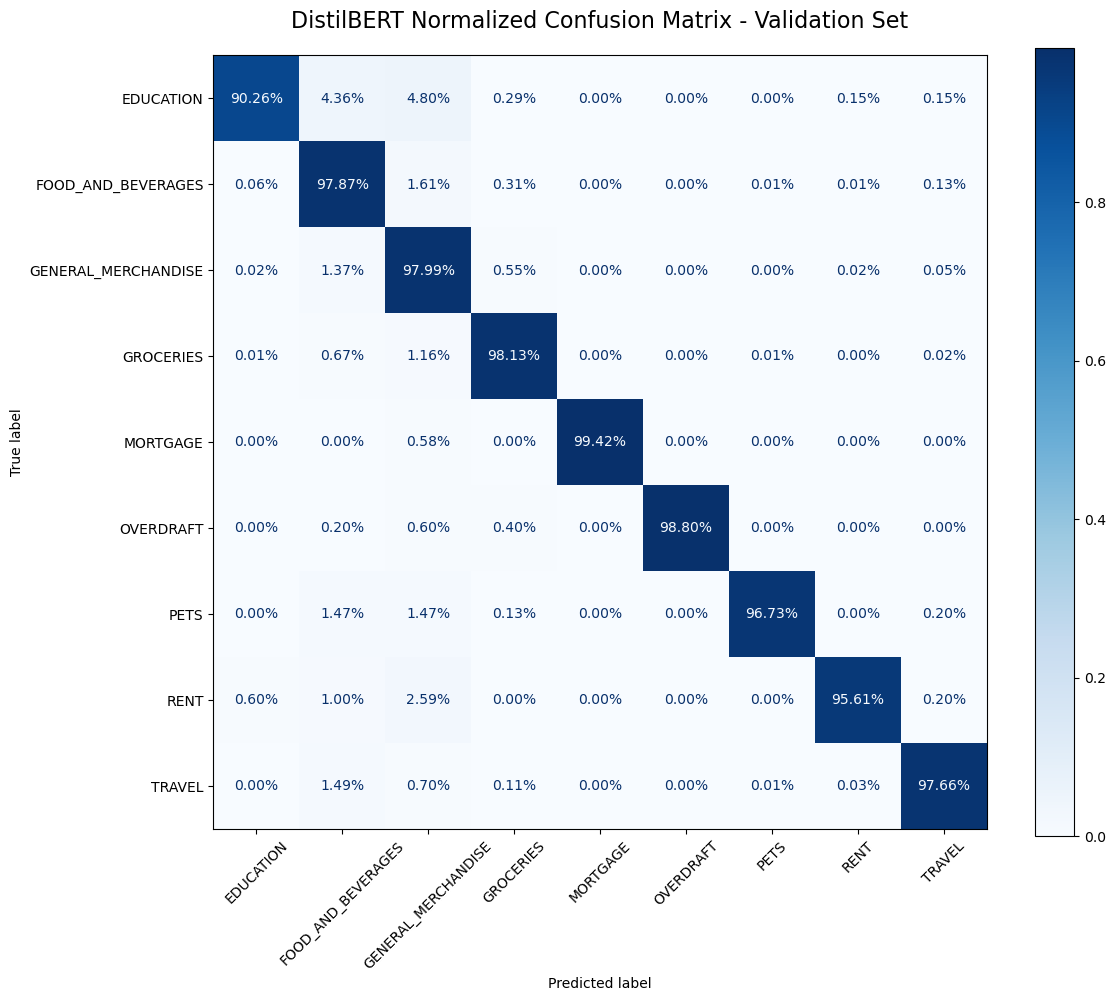


📊 Per-Category Performance:
                     precision    recall  f1-score   support

          EDUCATION     0.8961    0.9026    0.8993       688
 FOOD_AND_BEVERAGES     0.9797    0.9787    0.9792     78633
GENERAL_MERCHANDISE     0.9785    0.9799    0.9792     84491
          GROCERIES     0.9796    0.9813    0.9805     35224
           MORTGAGE     1.0000    0.9942    0.9971       173
          OVERDRAFT     0.9960    0.9880    0.9920       502
               PETS     0.9884    0.9673    0.9778      1500
               RENT     0.9411    0.9561    0.9485       501
             TRAVEL     0.9841    0.9766    0.9804      9918

           accuracy                         0.9792    211630
          macro avg     0.9715    0.9694    0.9704    211630
       weighted avg     0.9792    0.9792    0.9792    211630



In [70]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Get predictions on validation set
val_predictions = trainer.predict(val_dataset)
y_pred = np.argmax(val_predictions.predictions, axis=1)
y_true = val_labels.values  # or just val_labels if it's already numpy array

# Create NORMALIZED confusion matrix (percentages by row)
cm_normalized = confusion_matrix(y_true, y_pred, normalize='true')

# Plot
fig, ax = plt.subplots(figsize=(12, 10))
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm_normalized, 
    display_labels=label_encoder.classes_
)
disp.plot(ax=ax, xticks_rotation=45, cmap='Blues', values_format='.2%')
plt.title('DistilBERT Normalized Confusion Matrix - Validation Set', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

# Print detailed per-category breakdown
print("\n📊 Per-Category Performance:")
from sklearn.metrics import classification_report
print(classification_report(
    y_true, 
    y_pred, 
    target_names=label_encoder.classes_,
    digits=4
))


Aside from accuracy, we are also interested in evaluating our model with the **F1 Macro** metric, which calculates the F1 score equally for each class and averages them. This allows us to treat each class equally, which is important in this scenario since categories that appear less frequently, such as Mortgage and Rent, are just as important to correctly categorize as groups that appear very often, such as General Merchandise and Food and Beverages. The F1 Macro metric also handles class imbalance well. Accuracy may be misleading since our dataset is primarily dominated by education and food, and other categories are disproportionately represented.  